# What Factors Help Predict the Outcome of the 2020 Election?

## An Analysis by Neha Swamy 

### December 21, 2020

## Table of Contents
1. Introduction 
2. Data Collection
3. Data Preparation
4. Data Exploration
5. Analysis and Hypothesis Testing
6. Conclusions and Reflections
7. Works Cited

## 1. Introduction 

The result of the 2020 presidential election was a critical moment in our lives. Many of us were sitting with our hands gripped to the arms of our couches as the news anchors announced the projected winner of each state one by one. 

Although the overall outcome was not certain on the day of the election, we usually can predict the result within certain states. It's no shock that states like Kentucky, Alamaba, and Arkansas voted for Trump, while states like California, Massachusetts, and Connecticut voted for Biden. However, what exactly allows us to make such predictions? Is is the racial makeup? How about income? Education? Unemployment? In this project, I attempt to find the factors that are associated with the outcome of the 2020 election.

## 2. Data Collection

This is the data collection and preparation stage of the data life cycle. In this part, we collect data from websites, databases, csv files, etc.  

I will specifically be using a dataset from Kaggle that includes the percentage of voters who voted for Trump, the percentage of voters who voted for Biden, demographic information, coronavirus information, income information, and employment information by county. The dataset also includes the percentage of voters who voted for Trump and Clinton in the 2016 election. 

I will first be using the pandas library to read the data and put the data in a table known as a DataFrame. I will be using the .read_csv() function since the file is a .csv file. 

Here is the link to the pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [25]:
import pandas as pd

data = pd.read_csv('county_statistics.csv', sep = ',')

## 3. Data Processing

The next step of the data lifecycle is data processing. Here, we attempt to "clean up" our data to put it in a form that is more readable. Specifically, we can remove unnecessary columns, duplicate data, rows with missing information, etc.  

In this project, I will be removing an unnecessary column and rows with missing information.

In [26]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.dropna()

Since the percentage of voters who voted for Trump, Biden, and Clinton are in decimal form, let's update each row so that they reflect the percentage rather than the decimal. 

In [27]:
for index, row in data.iterrows():
    data.at[index, 'percentage16_Donald_Trump'] = data.at[index, 'percentage16_Donald_Trump'] * 100.0
    data.at[index, 'percentage16_Hillary_Clinton'] = data.at[index, 'percentage16_Hillary_Clinton'] * 100.0
    data.at[index, 'percentage20_Donald_Trump'] = data.at[index, 'percentage20_Donald_Trump'] * 100.0
    data.at[index, 'percentage20_Joe_Biden'] = data.at[index, 'percentage20_Joe_Biden'] * 100.0

Now, let's look at the first 10 values of the DataFrame to see what our data looks like.

In [29]:
data.head(10)

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,62.9,34.6,10724.0,6742.0,3712.0,66.1,33.0,12433.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,77.3,20.6,27386.0,21159.0,5638.0,79.5,19.1,28425.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,54.5,42.8,15755.0,8582.0,6737.0,54.2,44.7,16938.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,47.9,38.7,195587.0,93748.0,75676.0,50.4,46.5,259389.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,65.3,30.0,3759.0,2456.0,1127.0,69.7,28.6,4183.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
5,Adair,KY,80.6,16.1,8231.0,6637.0,1323.0,83.0,15.9,8766.0,...,2.6,0.5,3.4,22.2,7988.0,74.1,15.8,9.9,0.1,6.2
6,Adair,MO,59.4,34.5,10137.0,6019.0,3495.0,61.8,35.8,10337.0,...,4.0,2.6,4.0,17.1,11274.0,73.6,20.9,5.3,0.2,5.5
7,Adair,OK,73.5,21.2,6468.0,4753.0,1374.0,78.6,19.5,7108.0,...,2.8,1.0,3.2,23.1,8130.0,71.6,20.4,7.5,0.5,5.5
8,Adams,CO,42.1,49.4,175125.0,73807.0,86471.0,40.4,56.7,234599.0,...,1.2,1.1,5.0,29.2,246450.0,83.6,11.2,5.1,0.1,5.1
9,Adams,IA,66.9,27.1,2082.0,1393.0,565.0,70.8,27.3,2158.0,...,3.3,0.8,5.3,19.6,1796.0,72.0,12.1,15.5,0.3,4.2


## 4. Data Exploration and Visualization

The next step of the data lifecycle is to explore and visualize our data. This allows us to discover potential patterns and find points of interest before analyzing the data. 

Here, I will examine the different factors to see if there is an association between them and the percentage of voters who voted for Joe Biden, the projected winner of the 2020 election. Specifically, I will look at the white population, income, income per capita, unemployment rate, poverty rate, and the percentage of voters who voted for Hillary Clinton in 2016 of each county.

I will be using the seaborn library (https://seaborn.pydata.org/), a statistical data visualization library, to plot linear regression plots. I will also be using matplotlib to add information to the plots (https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html). 

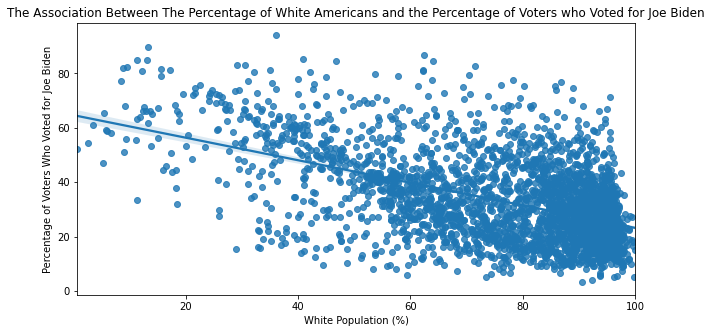

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as pyplot

def plt(x, xlabel, title, data):
    pyplot.figure(figsize = (10, 5))
    sns.regplot(x = x, y = 'percentage20_Joe_Biden', data = data)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel('Percentage of Voters Who Voted for Joe Biden')
    pyplot.show()

x = 'White'
xlabel = 'White Population (%)'
title = 'The Association Between The Percentage of White Americans and the Percentage of Voters who Voted for Joe Biden'
plt(x, xlabel, title, data)

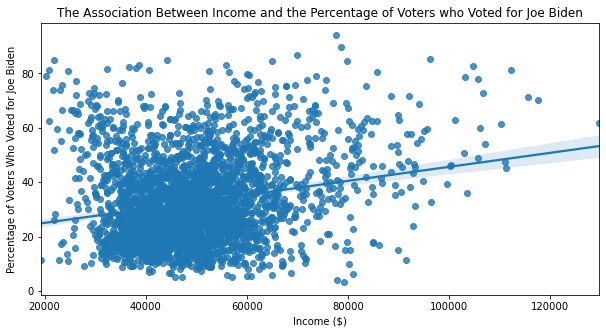

In [34]:
x = 'Income'
xlabel = 'Income ($)'
title = 'The Association Between Income and the Percentage of Voters who Voted for Joe Biden'
plt(x, xlabel, title, data)

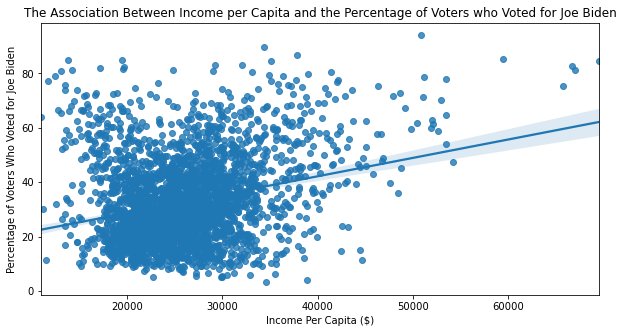

In [35]:
x = 'IncomePerCap'
xlabel = 'Income Per Capita ($)'
title = 'The Association Between Income per Capita and the Percentage of Voters who Voted for Joe Biden'
plt(x, xlabel, title, data)

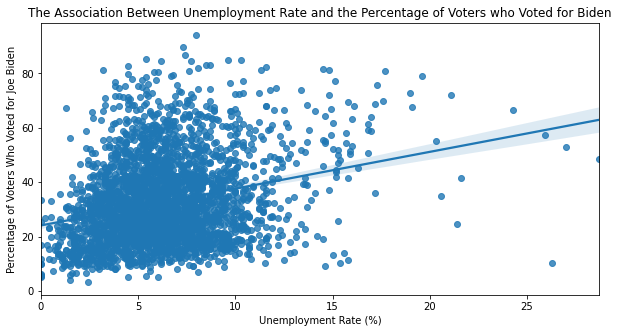

In [37]:
x = 'Unemployment'
xlabel = 'Unemployment Rate (%)'
title = 'The Association Between Unemployment Rate and the Percentage of Voters who Voted for Biden'
plt(x, xlabel, title, data)

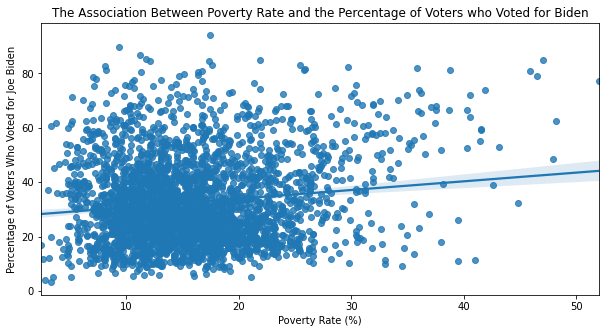

In [38]:
x = 'Poverty'
xlabel = 'Poverty Rate (%)'
title = 'The Association Between Poverty Rate and the Percentage of Voters who Voted for Biden'
plt(x, xlabel, title, data)

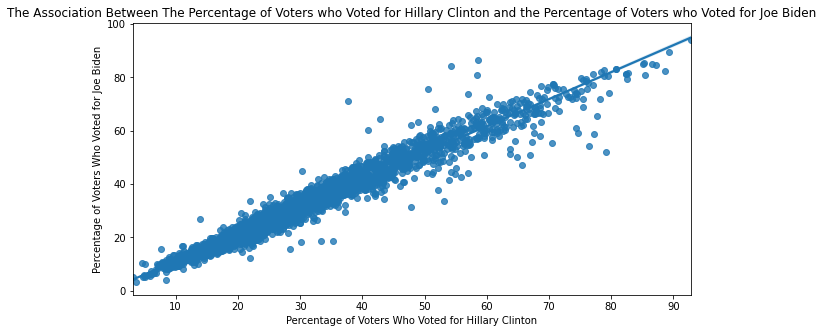

In [39]:
x = 'percentage16_Hillary_Clinton'
xlabel = 'Percentage of Voters Who Voted for Hillary Clinton'
title = 'The Association Between The Percentage of Voters who Voted for Hillary Clinton and the Percentage of Voters who Voted for Joe Biden'
plt(x, xlabel, title, data)

Looking at these plots, there seems to be a relationship between each factor and the percentage of voters who voted for Joe Biden. In particular, there is a negative relationship between the percentage of white Americans in the county and the percentage of those who voted for Biden, while there is a positive relationship for the other factors. It also looks like there is a very strong relationship between the percentage of voters who voted for Clinton in 2016 and those who voted for Biden in 2020. 

## 5. Analysis and Hypothesis Testing

Now that we have visualized the relationship between each factor and the outcome of the 2020 election, we want to analyze the data and perform hypothesis testing to see if the relationships are statistically significant; in other words, we want to determine if the results are likely not caused by chance. In this section, I will be performing linear regression and chi-square tests for independence. 

Since we created scatter plots, let's now look at the correlation coefficients of each factor to determine the strength. I will be using sklearn (https://scikit-learn.org/stable/), a machine learning library. sklearn has a function called LinearRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) that allows us to perform linear regression. I will use this function to derive the r-squared value, a statistical measure of how close the data are to the fitted line. I will then derive the square root of this value, which represents the direction (positive or negative) and strength of the relationship. 

In [40]:
from sklearn.linear_model import LinearRegression
from math import sqrt

# Get the data of each factor 
X1 = [[w] for w in data['White']]
X2 = [[i] for i in data['Income']]
X3 = [[i] for i in data['IncomePerCap']]
X4 = [[u] for u in data['Unemployment']]
X5 = [[p] for p in data['Poverty']]
X6 = [[h] for h in data['percentage16_Hillary_Clinton']]

# Our dependent variable is the percentage of voters who voted for Biden
y = data['percentage20_Joe_Biden']

'''
Perform linear regression for each factor vs. the percentage of voters who voted for Biden and use the .fit() function 
to get the r-squared value. Then, square the value to get the correlation coefficient. 
'''
reg = LinearRegression().fit(X1, y)

'''
Since we know that the relationship between white population and the percentage of voters who voted for Biden is 
negative, we can multiply the square root of the r-squared value by -1.
'''
r1 = sqrt(reg.score(X1, y)) * -1 

reg = LinearRegression().fit(X2, y)
r2 = sqrt(reg.score(X2, y))

reg = LinearRegression().fit(X3, y)
r3 = sqrt(reg.score(X3, y))

reg = LinearRegression().fit(X4, y)
r4 = sqrt(reg.score(X4, y))

reg = LinearRegression().fit(X5, y)
r5 = sqrt(reg.score(X5, y))
      
reg = LinearRegression().fit(X6, y)
r6 = sqrt(reg.score(X6, y))

# Print the correlation coefficients
print('% of White Residents vs. % of Biden voters: ' + str(r1))
print('Income vs. % of Biden voters: ' + str(r2))
print('Income per Capita vs. % of Biden voters: ' + str(r3))
print('Unemployment vs. % of Biden voters: ' + str(r4))
print('Poverty rate vs. % of Biden voters: ' + str(r5))
print('% of Clinton voters vs. % of Biden voters: ' + str(r6))

% of White Residents vs. % of Biden voters: -0.527246244784012
Income vs. % of Biden voters: 0.2138775046831241
Income per Capita vs. % of Biden voters: 0.2668367505170639
Unemployment vs. % of Biden voters: 0.2593405266953418
Poverty rate vs. % of Biden voters: 0.13413622169828548
% of Clinton voters vs. % of Biden voters: 0.9761973275142386


As shown by the correlation coefficients, there is a very strong relationship between the percentage of voters who voted for Clinton in 2016 and that of those voted for Biden in 2020. There is a moderately strong association between the percentage of white residents and the percentage of those who voted for Biden. There is weaker relationship between income, income per capita, unemployment rate, or poverty rate and the percentage of voters who voted for Biden. Thus, it seems that race and percentage of those who voted for Clinton are the two biggest factors that help predict the outcome of the 2020 election.

Although I am looking at the correlation coefficient here, the r-squared value is also important as it indicates how well the independent variable explains the variation of the dependent variable. Among these factors, the percentage of voters who voted for Hillary Clinton seems to be the only variable that explains this variation very well, as it has an r-squared value of approximately 0.95 (0.976 * 0.976). 

What if we use the chosen factor AND state? Does that make a difference in the coefficient of correlation?

I will be using NumPy (https://numpy.org/), a library for performing mathematic functions, and the .corrcoef() function (https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) to derive the correlation coefficients. I want to use NumPy instead of sklearn since we do not know the direction of the regression line. 

In [41]:
import numpy as np 

# Get a list of all the states 
states = data['state'].drop_duplicates()

# Create a DataFrame that will hold the data for each factor of each state
state_data = pd.DataFrame(columns = ['State', 'Percentage16_Hillary_Clinton', 'Income', 'White', 'Income Per Capita', 
                                     'Unemployment', 'Poverty'])
index = 0

# Iterate through the states and get the data of each state 
for state in states:
    X1 = data[data.state == state]['percentage16_Hillary_Clinton']
    X2 = data[data.state == state]['Income']
    X3 = data[data.state == state]['White']
    X4 = data[data.state == state]['IncomePerCap']
    X5 = data[data.state == state]['Unemployment']
    X6 = data[data.state == state]['Poverty']
    y = data[data.state == state]['percentage20_Joe_Biden']
    
    # Compute the correlation coefficients
    r1 = np.corrcoef(X1, y)
    r2 = np.corrcoef(X2, y)
    r3 = np.corrcoef(X3, y)
    r4 = np.corrcoef(X4, y)
    r5 = np.corrcoef(X5, y)
    r6 = np.corrcoef(X6, y)
    
    # Put the results in the DataFrame
    state_data.at[index, 'State'] = state
    state_data.at[index, 'Percentage16_Hillary_Clinton'] = r1[0, 1]
    state_data.at[index, 'Income'] = r2[0, 1]
    state_data.at[index, 'White'] = r3[0, 1]
    state_data.at[index, 'Income Per Capita'] = r4[0, 1]
    state_data.at[index, 'Unemployment'] = r5[0, 1]
    state_data.at[index, 'Poverty'] = r6[0, 1]
    
    index += 1

state_data.index = range(1, len(state_data) + 1)

/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Now that we have the correlation coefficients for each factor of each state, let's look at each factor individually. I will be sorting the results by the correlation coefficient.

In [42]:
HC = state_data[['State', 'Percentage16_Hillary_Clinton']].sort_values(by = 'Percentage16_Hillary_Clinton')
HC.index = range(1, 51)
HC

,State,Percentage16_Hillary_Clinton
1,NH,-0.590559
2,RI,-0.36134
3,VT,-0.0965266
4,MA,0.372058
5,ME,0.41645
6,CT,0.671977
7,HI,0.929397
8,AR,0.952888
9,TX,0.954245
10,TN,0.965956


It appears that the correlation between the percentage of voters who voted for Clinton in 2016 and the percentage of voters who voted for Biden in 2020 is very strong and positive for every state except for 
* New Hampshire (moderate and negative)
* Rhode Island (moderate and negative)
* Vermonth (weak and negative)
* Massachusetts (moderate and positive)
* Maine (moderate and positive)
* Connecticut (moderate and positive) 

In [43]:
income = state_data[['State', 'Income']].sort_values(by = 'Income')
income.index = range(1, 51)
income

,State,Income
1,HI,-0.750996
2,RI,-0.718499
3,VT,-0.607722
4,MS,-0.58954
5,CT,-0.501043
6,ND,-0.450082
7,AL,-0.445215
8,SC,-0.394257
9,SD,-0.363785
10,NH,-0.258198


The correlation coefficients of Income vs. % of voters who voted for Biden have a much wider range. It seems that Hawaii and Delaware are the only two states where the correlation is very strong, with Hawaii having a negative association and Delaware having a positive correlation.

In [44]:
income_per_capita = state_data[['State', 'Income Per Capita']].sort_values(by = 'Income Per Capita')
income_per_capita.index = range(1, 51)
income_per_capita

,State,Income Per Capita
1,RI,-0.68652
2,HI,-0.592613
3,NH,-0.589962
4,ND,-0.58532
5,SD,-0.556433
6,MS,-0.519906
7,SC,-0.335362
8,AL,-0.317739
9,MT,-0.31224
10,CT,-0.215345


As with income, the correlation coefficients of income per capita vs. % of voters who voted for Biden has a very large range. Some states have a negative correlation, while others have a positive correlation. It also does not appear that any state has a very strong correlation. Most states have a weak or moderate association. Some states, including Arkansas, Kansas, and New Jersey, have virtually no correlation.

In [45]:
white = state_data[['State', 'White']].sort_values(by = 'White')
white.index = range(1, 51)
white

,State,White
1,AL,-0.97708
2,MS,-0.974944
3,LA,-0.942384
4,SC,-0.914585
5,GA,-0.889558
6,DE,-0.881234
7,NJ,-0.876839
8,AR,-0.869588
9,MD,-0.86808
10,RI,-0.864532


Most states appear to have a moderate to strong correlation between % of white residents vs. % of voters who voted for Biden. Most states also have a negative association. Interestingly, Hawaii has a strong association between % of White residents vs. % of voters who voted for Biden, as it has a correlation coefficient of 0.748. Thus, counties with a higher percentage of white residents tended to vote for Biden more, the opposite of most other states. Some states like Vermont, Washington, Idaho, and Colorado have a very weak correlation, meaning that the makeup of the white population did not really affect the outcome in these states. 

In [46]:
unemployment = state_data[['State', 'Unemployment']].sort_values(by = 'Unemployment')
unemployment.index = range(1, 51)
unemployment

,State,Unemployment
1,MA,-0.800506
2,NH,-0.465392
3,KY,-0.436563
4,WV,-0.348316
5,OR,-0.347594
6,FL,-0.285034
7,CA,-0.23465
8,VA,-0.19873
9,MO,-0.186072
10,MI,-0.18373


The correlation coefficients range from strong and negative to strong and positive. However, it seems that most states have a weak to moderate correlation between unemployment rate and the percentage of voters who voted for Biden. 

In [47]:
poverty = state_data[['State', 'Poverty']].sort_values(by = 'Poverty')
poverty.index = range(1, 51)
poverty

,State,Poverty
1,NH,-0.567405
2,KY,-0.490007
3,MD,-0.404241
4,ME,-0.355767
5,WA,-0.338037
6,MA,-0.331302
7,CA,-0.306772
8,DE,-0.295615
9,MO,-0.292322
10,TN,-0.289936


The correlation coefficients for poverty rate range from negative and moderate to positive and strong. Conneciticut, Rhode Island, and Mississipi have the strongest positive correlations. All other states have a weak to moderate association between poverty and the percentage of voters who voted for Biden.

Across the board, race and the percentage of voters who voted for Hillary Clinton are the two factors that have a strong correlation with the outcome of the 2020 election. Some states have a strong or moderate correlation between poverty, income, income per capita, and unemployment and the outcome of this election, but the correlation varies a lot more between state. 

Now, I will use hypothesis testing to test the results and see if there if the data is meaningful/significant. In other words, we want to see if the outcome of the 2016 election, the percentage of white residents, income, income per capita, unemployment rate, and poverty rate really are factors that helped predict the outcome of the 2020 election. 

I will specifically be running a chi-square test of independence using scipy.stats (https://docs.scipy.org/doc/scipy/reference/stats.html). For each variable, we will be dividing the percentages into low and high. The low/high cutoffs will be explained for each test later. The null and alternative hypotheses are the following: 

H_o: There is no association between [factor] and the outcome of the 2020 election.

H_a: There is an association between [factor] and the outcome of the 2020 election. 

I will be rejecting the null hypothesis if we get a p-value of less than 0.05. 

Below, I created a function to create the chi-square tables and compute the p-value. 

Here is more information about chi-square tests in case you are unfamiliar: https://libguides.library.kent.edu/spss/chisquare#:~:text=The%20Chi%2DSquare%20Test%20of%20Independence%20determines%20whether%20there%20is,Chi%2DSquare%20Test%20of%20Association.

Here is more information about the chi2_contingency function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html 

In [70]:
# Library to perform chi square test of independence
from scipy.stats import chi2_contingency as chisquare

def compute_chi_square(data, factor, cutoff):
    '''
    Create a table to hold the number of observations (counties) that fall under the 'Low' (i.e. low percentage of
    voters who voted for Biden/Clinton, low income, low income per capita, etc.) category and the number of 
    observations that fall under the 'High' category. The first row corresponds to counties in which Biden won, 
    and the second row corresponds to counties in which Biden lost. 
    '''
    table = pd.DataFrame(columns = ['Low', 'High'])
    table.at[0, 'Low'] = 0
    table.at[1, 'Low'] = 0 
    table.at[0, 'High'] = 0
    table.at[1, 'High'] = 0
    
    # Iterate through the data to count the number of observations that fall under the low and high categories. 
    for index, row in data.iterrows(): 
        biden = data.at[index, 'percentage20_Joe_Biden']
        obs = data.at[index, factor]
        
        '''
        If Biden won in the county, we will increase the count in the first row. Otherwise, we will increase the 
        count in the second row. We will determine which column ('Low'/'High') to increment based on whether or not 
        the observation is considered low or high. 
        '''
        if (biden > 50.0):
            if (obs <= cutoff):
                table.at[0, 'Low'] += 1
            
            else:
                table.at[0, 'High'] += 1
        
        else:
            if (obs <= cutoff):
                table.at[1, 'Low'] += 1
            
            else:
                table.at[1, 'High'] += 1
    
    cs = chisquare(table)
    # Return the p-value
    return table, cs, cs[1]

First, I will focus on the percentage of voters who voted for Hillary Clinton in 2016. I will be using a cutoff value of 50.0 since > 50.0 means that Clinton won in a given county. 

In [74]:
table, cs, p = compute_chi_square(data, 'percentage16_Hillary_Clinton', 50.0)
print(p)

0.0


Since we have a p-value of less than 0.05, we can reject the null hypothesis of no association between percentage of voters who voted for Clinton in 2016 and the percentage of voters who voted for Biden in 2020. 

Next, I will focus on income. Since the median national household income in 2019 was $68,703, I will using that value as the cutoff.

In [77]:
table, cs, p = compute_chi_square(data, 'Income', 68703)
print(p)

5.2201075823590994e-30


Since we have a p-value less than 0.05, we can reject the null hypothesis of no association between income and the percentage of voters who voted for Biden. 

I will then focus on income per capita. I will be using the national income per capita in 2019 of $34,103 (U.S. Census Bureau)

In [55]:
table, cs, p = compute_chi_square(data, 'IncomePerCap', 34103)

2.7860478070533544e-51

We have another p-value less than 0.05, so we can reject the null hypothesis of no association between income per capita and the percentage of voters who voted for Biden.

Now, I will focus on the percentage of residents who are white. I will be using a value of 76.3, the national percentage. 

In [79]:
table, cs, p = compute_chi_square(data, 'White', 76.3)
print(p)

6.209847965620941e-65


Since the p-value is very close to 0, we can reject the null hypothesis of no association between the percentage of residents who are white and the percentage of voters who voted for Biden.

The next factor is poverty. I will be using the national poverty rate in 2019 (10.5%) as the cutoff (U.S. Census Bureau).

In [82]:
table, cs, p = compute_chi_square(data, 'Poverty', 10.5)
print(p)

0.2770381385183103


Here, the p-value is greater than 0.05, so we fail to reject the null hypothesis of no association between poverty rate and the percentage of voters who voted for Biden. 

The last factor is unemployment rate. I will be using a cutoff of 4.5% since unemployment rates of 4.5% or below are considered to be good. 

In [85]:
table, cs, p = compute_chi_square(data, 'Unemployment', 4.5)
print(p)

4.394533162225231e-09


Since the p-value is very close to 0, we reject the null hypothesis of no association between the unemployment rate and the percentage of voters who voted for Biden. 

According to the results of these tests, there appears to be an association between the percentage of voters who voted for Clinton in 2016, income, income per cepita, the percentage of the population that is white, and unemployment rate and the percentage of voters who voted for Biden in 2020 but not with poverty rate. 

## 6. Insight

Here, we will use the results from our analysis and hypothesis tests to draw conclusions. 

As said before, there appears to be an association between the percentage of voters who voted for Clinton in 2016, income, income per cepita, the percentage of the population that is white, and unemployment rate and the percentage of voters who voted for Biden in 2020. However, there does not appear to be an association between poverty and the outcome of the election. Moreover, even though the only variable to have a very high r-squared value was the percentage of voters who voted for Clinton in 2016, the p-values from the chi-square tests still indicate that there is an association between the other factors (except for poverty) and the percentage of voters who voted for Biden. This is not surprising because we are focusing on people. The results still indicate that that there is a real relationship between our independent variables and our dependent variable. Here is some more information explaining the case of a low p-value but a low r-squared value: https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-a-regression-model-with-low-r-squared-and-low-p-values#:~:text=For%20example%2C%20many%20psychology%20studies,because%20people%20are%20fairly%20unpredictable.&text=The%20good%20news%20is%20that,predictors%20and%20the%20response%20variable.

One thing to keep in mind is that correlation does not equal causation. In other words, being white does not cause one to not vote for Biden, nor does being a Clinton voter cause one to vote for Biden. Thus, the results do raise the question, what DOES cause a county with more people of color, higher income, higher income per capita, etc. to vote for Biden? That is something that we can explore in the future. 

We could potentially use this data to predict the outcome of future elections, but instead of using the outcome of the 2016 election as a factor to predict the outcome of the 2024 election, we can use the outcome of this election. We could also use different factors, like the total number of coronavirus cases in 2020 per county since the pandemic obviously was an important aspect of this year to say the least. 

## 7. Works Cited

Amadeo, Kimberly. “Why Zero Unemployment Isn't as Good as It Sounds.” The Balance, The Balance, 30 Aug. 2020, 
    www.thebalance.com/natural-rate-of-unemployment-definition-and-trends-3305950. 

“How to Interpret a Regression Model with Low R-Squared and Low P Values.” The Minitab Blog, Minitab, 12 June 2014, 
    blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-a-regression-model-with-low-r-squared-and-low-p-
    values. 
    
“Income and Poverty in the United States: 2019.” The United States Census Bureau, The United States Census Bureau, 15 
    Sept. 2020, www.census.gov/library/publications/2020/demo/p60-270.html. 
    
“U.S. Census Bureau QuickFacts: United States.” The United States Census Bureau, The United States Census Bureau, 1 
    July 2019, www.census.gov/quickfacts/fact/table/US/PST045219. 
    
“U.S. Census Bureau QuickFacts: United States.” The United States Census Bureau, The United States Census Bureau, 1 
    July 2019, www.census.gov/quickfacts/fact/table/US/SEX255219. 